In [13]:
import matplotlib.pyplot as plt
import os

In [14]:
sample_name = "PS01031_benchmark"


folder = "/mmfs1/gscratch/stergachislab/bohaczuk/scripts/DAF-QC-SMK/benchmark/"


# get all files containing sample name
files = [f for f in os.listdir(folder) if sample_name in f and f.endswith('.txt')]


In [15]:
times = {} # clock time, cpu time in seconds
for file in files:
    with open(folder + file, 'r') as f:
        f = f.readlines()
        time = [float(f[1].split()[0]), float(f[1].split()[9])]
        times[file]=(time)

print(times)

{'PS01031_benchmark.seqplot_benchmark.consensus.chr5_34760400_34763141.txt': [3.1514, 1.39], 'PS01031_benchmark.align_benchmark.consensus.txt': [57.6889, 75.89], 'PS01031_benchmark.targetplot_benchmark.txt': [6.2251, 1.15], 'PS01031_benchmark.align_benchmark.reads.txt': [695.8361, 2619.03], 'PS01031_benchmark.dedupplot_benchmark.htt.exp_500_3831.txt': [12.6572, 1.57], 'PS01031_benchmark.seqplot_benchmark.reads.chr5_34760400_34763141.txt': [17.5901, 11.38], 'PS01031_benchmark.decorate_benchmark.txt': [429.9394, 382.77], 'PS01031_benchmark.dedupqc_benchmark.txt': [39.3187, 1.24], 'PS01031_benchmark.dedupplot_benchmark.chr5_34760400_34763141.txt': [12.6598, 1.59], 'PS01031_benchmark.seqqc_benchmark.consensus.txt': [11.6458, 7.63], 'PS01031_benchmark.targetqc_benchmark.txt': [25.6848, 53.27], 'PS01031_benchmark.seqplot_benchmark.reads.htt.exp_500_3831.txt': [13.6581, 8.7], 'PS01031_benchmark.dedup_benchmark.txt': [13387.5882, 129378.52], 'PS01031_benchmark.filterbam_benchmark.txt': [120.44

In [20]:
plot_time = 0
cpu_plot_time = 0
times_cleaned= {}
for key in times:
    if "plot" in key:
        plot_time += times[key][0]
        cpu_plot_time += times[key][1]
    else:
        times_cleaned[key] = times[key]

times_cleaned["plotting"] = [plot_time, cpu_plot_time]



# rename the keys
times_cleaned = {k.replace(f"{sample_name}.", ""): v for k, v in times_cleaned.items()}
times_cleaned = {k.replace(f"_benchmark.txt", ""): v for k, v in times_cleaned.items()}
times_cleaned = {k.replace(f"_benchmark.reads.txt", " reads"): v for k, v in times_cleaned.items()}
times_cleaned = {k.replace(f"_benchmark.consensus.txt", " consensus"): v for k, v in times_cleaned.items()}


In [19]:
print(times_cleaned)

{'align consensus': [57.6889, 75.89], 'align reads': [695.8361, 2619.03], 'decorate': [429.9394, 382.77], 'dedupqc': [39.3187, 1.24], 'seqqc consensus': [11.6458, 7.63], 'targetqc': [25.6848, 53.27], 'dedup': [13387.5882, 129378.52], 'filterbam': [120.4429, 223.42], 'dashboard': [18.0941, 1.86], 'seqqc reads': [5871.1376, 6046.57], 'consensus': [2101.3346, 2119.36], 'plotting': 69.11390000000002}


Text(0.5, 1.0, 'Benchmarking Times for DAF-QC-SMK')

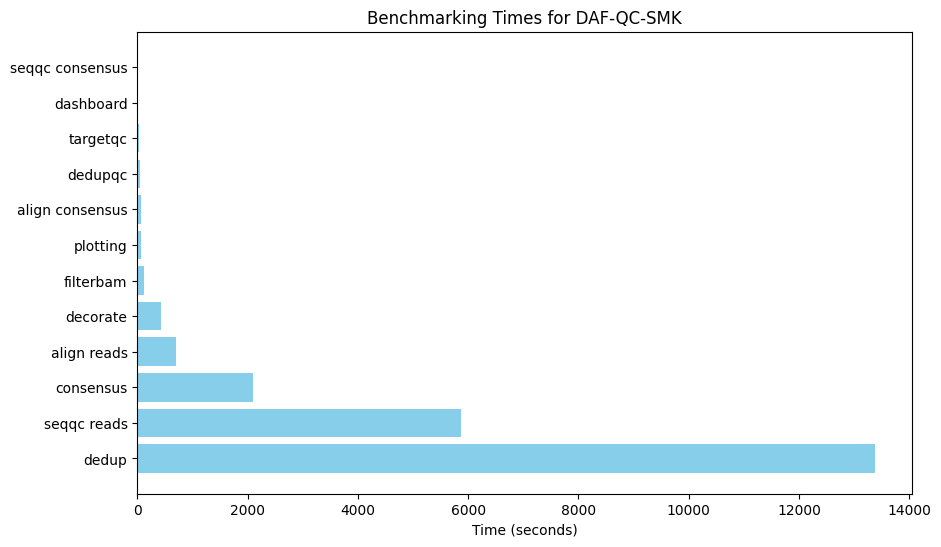

In [ ]:
# plot times
# sort by time
times_cleaned = dict(sorted(times_cleaned.items(), key=lambda item: item[1][0], reverse=True))
plt.figure(figsize=(10, 6))
plt.barh(list(times_cleaned.keys()), [v[0] for v in times_cleaned.values()], color='skyblue')
plt.xlabel('Time (seconds)')
plt.title('Benchmarking Times for DAF-QC-SMK')

Text(0.5, 1.0, 'CPU Benchmarking Times for DAF-QC-SMK')

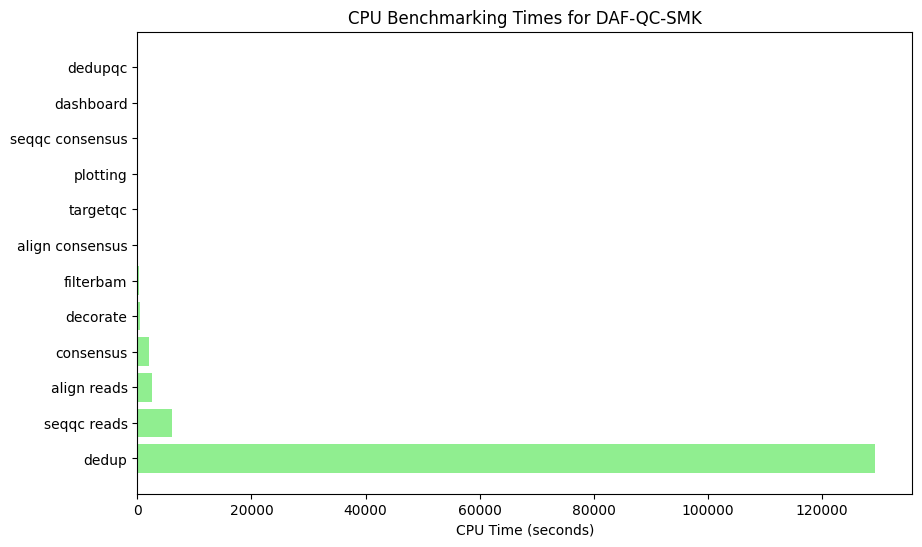

In [24]:
# plot cpu times
# sort by cpu time
times_cleaned_cpu = dict(sorted(times_cleaned.items(), key=lambda item: item[1][1], reverse=True))
plt.figure(figsize=(10, 6))
plt.barh(list(times_cleaned_cpu.keys()), [v[1] for v in times_cleaned_cpu.values()], color='lightgreen')
plt.xlabel('CPU Time (seconds)')
plt.title('CPU Benchmarking Times for DAF-QC-SMK')  